In [24]:
#matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
ride_data_to_load = "data/ride_data.csv"
city_data_to_load = "data/city_data.csv"

# Read the City and Ride Data
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

city_data = pd.read_csv(city_data_to_load)
city_data.head()

# Combine the data into a single dataset
pyber_table = pd.merge(ride_data, city_data, on=["city","city"], how="left")

# Save the merged table to a csv file for me to check on the data
# pyber_table.to_csv("export/pyber_table.csv")

# Display the data table for preview
pyber_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [25]:
#Data Frames for each of the City Types
urban_df = pyber_table[pyber_table["type"]=="Urban"]
rural_df = pyber_table[pyber_table["type"]=="Rural"]
suburban_df = pyber_table[pyber_table["type"]=="Suburban"]

#Groupby City for each data frame 
urban_group = urban_df.groupby("city")
rural_group = rural_df.groupby("city")
suburban_group = suburban_df.groupby("city")

#Set Up Variables for each of the City Types

#Rides
urban_ride_count = urban_group["ride_id"].count()
rural_ride_count = rural_group["ride_id"].count()
suburban_ride_count = suburban_group["ride_id"].count()

#Fares 
urban_ave_fare = urban_group["fare"].mean()
rural_ave_fare = rural_group["fare"].mean()
suburban_ave_fare = suburban_group["fare"].mean()

#Drivers (take the mean because the driver counts show up multiple times in the merged table)
urban_driver = urban_group["driver_count"].mean()
rural_driver = rural_group["driver_count"].mean()
suburban_driver = suburban_group["driver_count"].mean()


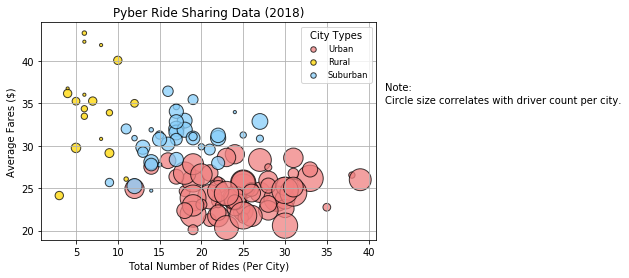

In [26]:
# Build the scatter plots for each of the three city types
# play around with edgecolors, linewidths, and alpha - got it!
plt.scatter(urban_ride_count, urban_ave_fare, marker="o", facecolors="lightcoral", edgecolors="black", linewidths=1, 
            alpha=.75,s=urban_driver*10,label="Urban")
plt.scatter(rural_ride_count, rural_ave_fare, marker="o", facecolors="gold", edgecolors="black", linewidths=1,
            alpha=.75,s=rural_driver*10, label="Rural")
plt.scatter(suburban_ride_count, suburban_ave_fare, marker="o", facecolors="lightskyblue", edgecolors="black", linewidths=1,
            alpha=.75,s=suburban_driver*10, label="Suburban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=10)
plt.ylabel("Average Fares ($)", fontsize=10)
plt.grid(True)

# Legend
legend = plt.legend(fontsize="small", loc="best", title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Side note - location in the chart (x,y,"text")
plt.text(42,36.5,"Note:")
plt.text(42,35,"Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/PyberRideShare_ScatterPlot.png")

# Show plot
plt.show()

## Total Fares by City Type

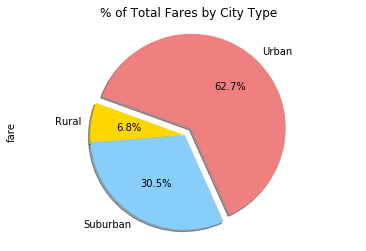

In [27]:
# Create a Group for Fares and Rides Pie Charts
type_group = pyber_table.groupby("type")

# Sum the Total Fares per City Type
type_fare = type_group["fare"].sum()

# Pie Chart Variable Parameters (colors of each section and explode) 
# play around with shadow, startangle, and explosion - got it!
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
fare_chart = type_fare.plot(kind="pie",y=type_fare, title="% of Total Fares by City Type", autopct="%1.1f%%", shadow=True,
                           startangle=160, colors=colors, explode=explode)

# Tells matplotlib that we want a pie chart with equal axis
plt.axis("equal")

# Save Figure
plt.savefig("Images/Fares_PieChart.png")

# Show Figure
plt.show()

## Total Rides by City Type

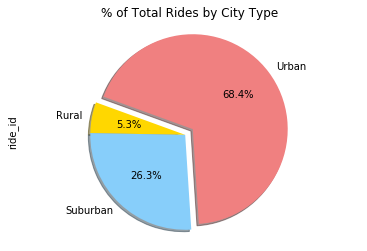

In [28]:
# Total Rides per City Type from type_group
type_ride = type_group["ride_id"].count()

# Pie Chart Variable Parameters (colors of each section and explode)
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
ride_chart = type_ride.plot(kind="pie",y=type_ride, title="% of Total Rides by City Type", autopct="%1.1f%%", shadow=True,
                           startangle=160, colors=colors, explode=explode)

# Tells matplotlib that we want a pie chart with equal axis
plt.axis("equal")

# Save Figure
plt.savefig("Images/Rides_PieChart.png")

# Show Figure
plt.show()

## Total Drivers by City Type

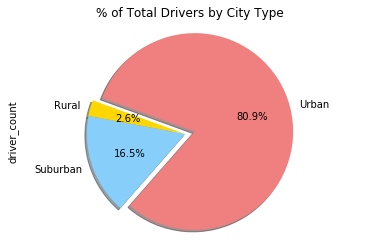

In [29]:
# Create a Group for Driver Pie Chart using the city_data file
cd_type_group = city_data.groupby("type")

# Total Drivers per City Type from type_group from city_data.csv file
type_driver = cd_type_group["driver_count"].sum()

# Pie Chart Variable Parameters (colors of each section and explode)
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
driver_chart = type_driver.plot(kind="pie",y=type_driver, title="% of Total Drivers by City Type", autopct="%1.1f%%", shadow=True,
                           startangle=160, colors=colors, explode=explode)

# Tells matplotlib that we want a pie chart with equal axis
plt.axis("equal")

# Save Figure
plt.savefig("Images/Drivers_PieChart.png")

# Show Figure
plt.show()